In [25]:
# Import Libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
from scipy.cluster.hierarchy import linkage, dendrogram
from pandas.plotting import andrews_curves
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

# Column Transformer
from sklearn.compose import ColumnTransformer

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv('liver_cirrhosis.csv')

In [27]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [28]:
df.tail()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2
24999,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [29]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549,2.00116
std,1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436,0.81387
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.00000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000,1.00000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000,2.00000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000,3.00000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.00000


In [30]:
df.shape

(25000, 19)

In [31]:
# Identify categorical variables
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Identify numerical variables
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Variables:", categorical_vars)
print("Numerical Variables:", numerical_vars)


Categorical Variables: ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
Numerical Variables: ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


In [32]:
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [33]:
df.duplicated().sum()

15361

In [34]:
# Check the number of duplicate rows
num_duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

# Drop the duplicate rows
df_cleaned = df.drop_duplicates()

# Verify if duplicates are dropped
num_duplicates_after = df_cleaned.duplicated().sum()
print(f'Number of duplicate rows after dropping: {num_duplicates_after}')

Number of duplicate rows: 15361
Number of duplicate rows after dropping: 0


Box Plot Visualization for Numerical Variables:


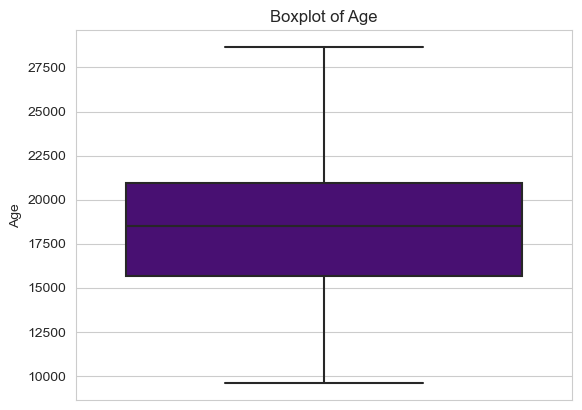

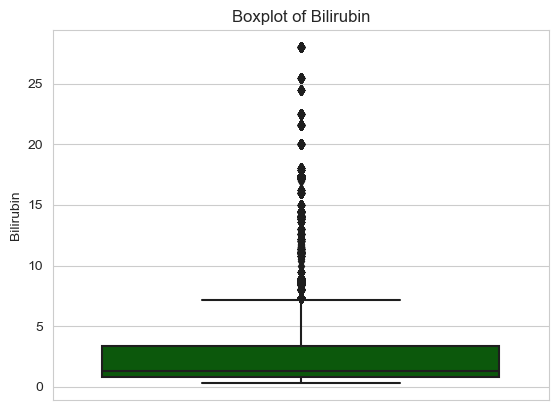

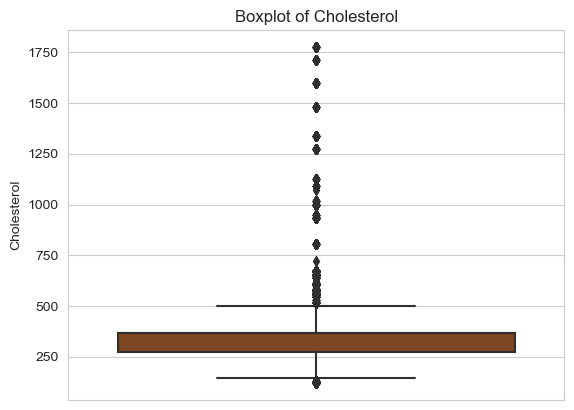

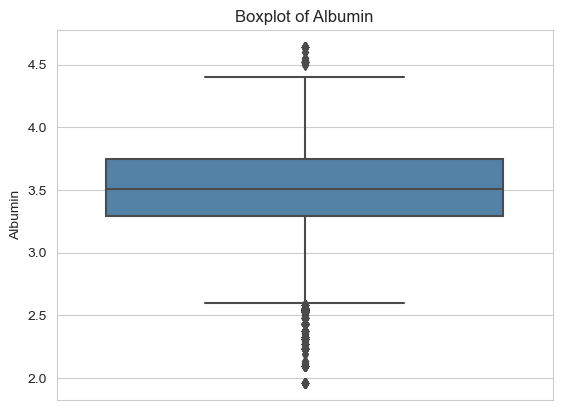

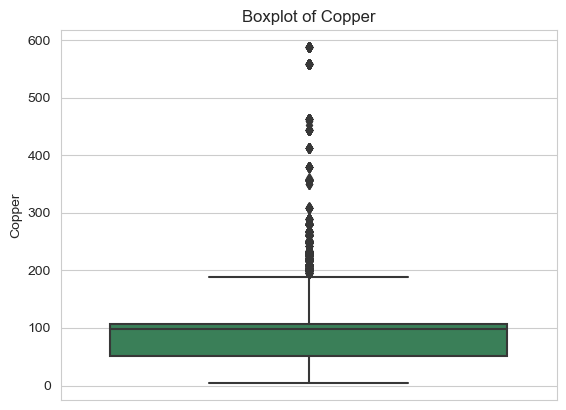


Z-Score Method for Numerical Variables:
Number of outliers in Age (Z-Score Method): 0
Number of outliers in Bilirubin (Z-Score Method): 521
Number of outliers in Cholesterol (Z-Score Method): 623
Number of outliers in Albumin (Z-Score Method): 198
Number of outliers in Copper (Z-Score Method): 437

IQR Method for Numerical Variables:
Number of outliers in Age (IQR Method): 0
Number of outliers in Bilirubin (IQR Method): 3274
Number of outliers in Cholesterol (IQR Method): 2252
Number of outliers in Albumin (IQR Method): 745
Number of outliers in Copper (IQR Method): 2335

Frequency Analysis for Categorical Variables:
Number of outliers in Status (Frequency Analysis): 0
Number of outliers in Drug (Frequency Analysis): 0
Number of outliers in Sex (Frequency Analysis): 0
Number of outliers in Ascites (Frequency Analysis): 0
Number of outliers in Hepatomegaly (Frequency Analysis): 0
Number of outliers in Spiders (Frequency Analysis): 0


In [35]:
## Outlier Detection

# Define colors
colors = ['#4B0082', '#006400', '#8B4513', '#4682B4', '#2E8B57', '#87CEEB', '#FFC0CB']

# Selecting columns
numerical_columns = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper']
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders']

# Set the style for seaborn
sns.set_style("whitegrid")

# Box Plot Visualization for Numerical Variables
print("Box Plot Visualization for Numerical Variables:")
for col in numerical_columns:
    sns.boxplot(y=df[col], color=colors[numerical_columns.index(col) % len(colors)])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Z-Score Method for Numerical Variables
print("\nZ-Score Method for Numerical Variables:")
def z_score_outliers(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = [(y - mean) / std for y in data]
    outliers = np.where(np.abs(z_scores) > threshold)
    return outliers[0].size

for col in numerical_columns:
    num_outliers = z_score_outliers(df[col])
    print(f'Number of outliers in {col} (Z-Score Method):', num_outliers)

# IQR Method for Numerical Variables
print("\nIQR Method for Numerical Variables:")
def iqr_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = np.where((data < lower_bound) | (data > upper_bound))
    return outliers[0].size

for col in numerical_columns:
    num_outliers = iqr_outliers(df[col])
    print(f'Number of outliers in {col} (IQR Method):', num_outliers)

# Frequency Analysis for Categorical Variables
print("\nFrequency Analysis for Categorical Variables:")
threshold = 5  # Define a threshold for low frequency
for col in categorical_columns:
    counts = df[col].value_counts()
    outliers = counts[counts < threshold].index
    num_outliers = len(outliers)
    print(f'Number of outliers in {col} (Frequency Analysis):', num_outliers)



In [36]:
import pandas as pd
df['Age'] = df['Age'] / 365 # Convert days to years (considering leap years)
df['Age'] = df['Age'].round() # Round the age to the nearest whole number
bins = [25, 35, 45, 100]  # Define age bins
labels = ['Young', 'Adult', 'Senior']  # Define labels for bins
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
print(df[['Age', 'Age_Group']].head())

    Age Age_Group
0  51.0    Senior
1  54.0    Senior
2  32.0     Young
3  45.0     Adult
4  59.0    Senior


## Descriptive Analysis

In [37]:
X= df.drop(columns=['Stage'])
Y = df['Stage']
x_train , x_test, y_train , y_test = train_test_split(X,Y,test_size=0.2)

x_train['Stage'] = y_train
df = x_train

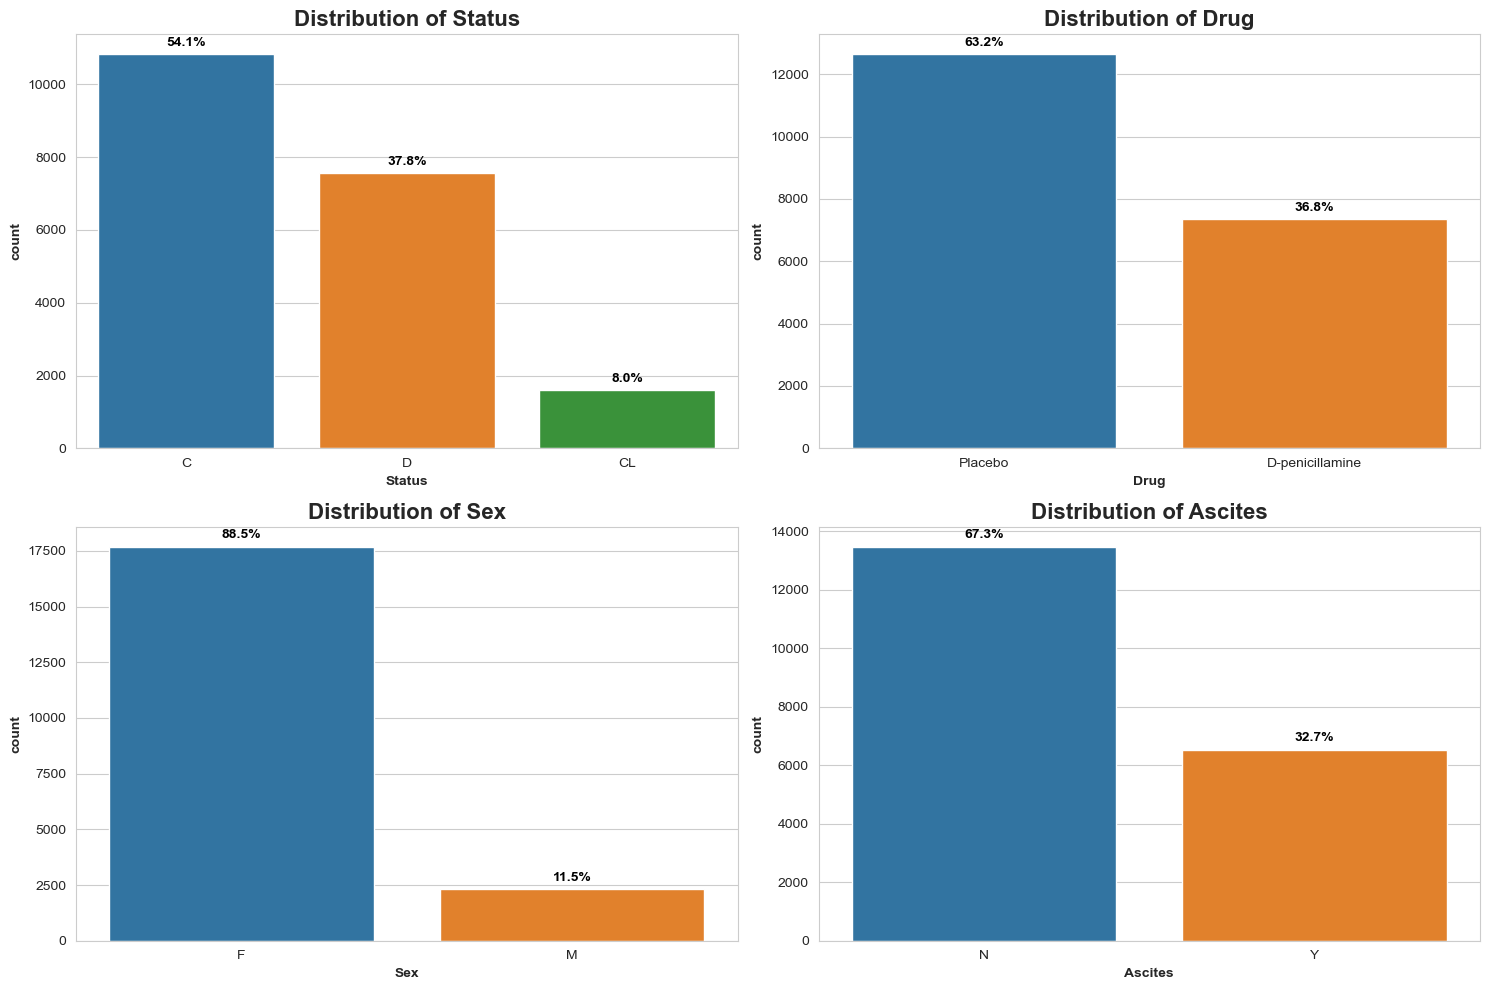

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set_style("whitegrid")

# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Function to annotate bars with percentages
def annotate_with_percentages(ax, data, column):
    total = data[column].value_counts()
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total.sum()) * 100
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center',
                    xytext=(0, 8), 
                    textcoords='offset points',
                    fontsize=10, color='black', fontweight='bold')

# Plot for 'Status'
sns.countplot(x='Status', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Status', fontweight='bold', fontsize=16)
axes[0, 0].set_xlabel(axes[0, 0].get_xlabel(), fontweight='bold')
axes[0, 0].set_ylabel(axes[0, 0].get_ylabel(), fontweight='bold')
annotate_with_percentages(axes[0, 0], df, 'Status')

# Plot for 'Drug'
sns.countplot(x='Drug', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Drug', fontweight='bold', fontsize=16)
axes[0, 1].set_xlabel(axes[0, 1].get_xlabel(), fontweight='bold')
axes[0, 1].set_ylabel(axes[0, 1].get_ylabel(), fontweight='bold')
annotate_with_percentages(axes[0, 1], df, 'Drug')

# Plot for 'Sex'
sns.countplot(x='Sex', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Sex', fontweight='bold', fontsize=16)
axes[1, 0].set_xlabel(axes[1, 0].get_xlabel(), fontweight='bold')
axes[1, 0].set_ylabel(axes[1, 0].get_ylabel(), fontweight='bold')
annotate_with_percentages(axes[1, 0], df, 'Sex')

# Plot for 'Ascites'
sns.countplot(x='Ascites', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Ascites', fontweight='bold', fontsize=16)
axes[1, 1].set_xlabel(axes[1, 1].get_xlabel(), fontweight='bold')
axes[1, 1].set_ylabel(axes[1, 1].get_ylabel(), fontweight='bold')
annotate_with_percentages(axes[1, 1], df, 'Ascites')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



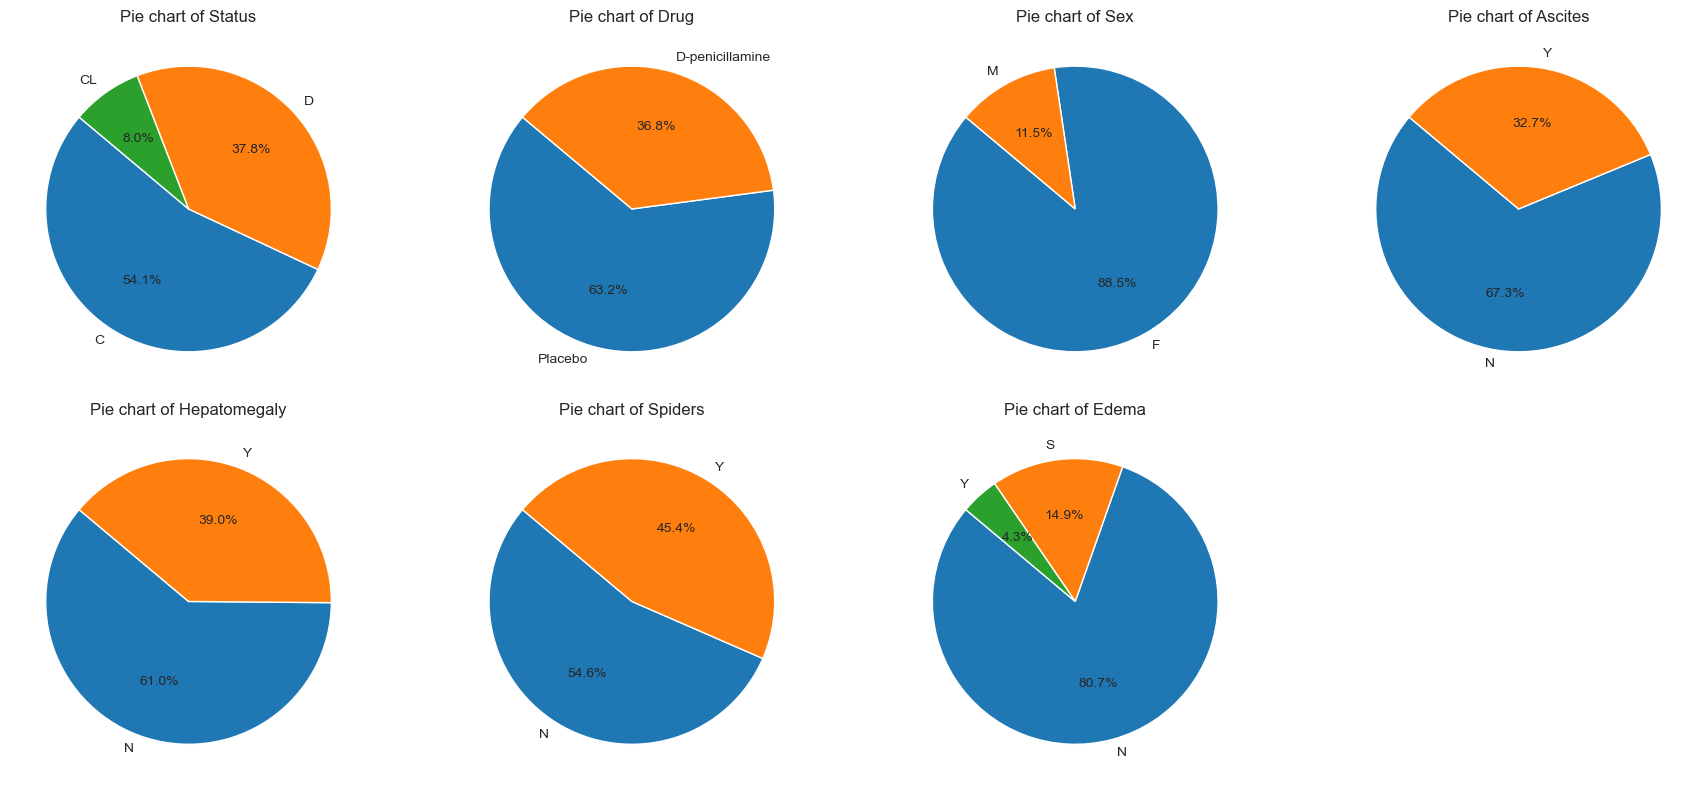

In [39]:
# Define the categorical columns
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(18, 8))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot each categorical variable
for i, column in enumerate(categorical_columns):
    # Pie chart
    if len(df[column].unique()) <= 5:
        axs[i].pie(df[column].value_counts(), labels=df[column].value_counts().index, autopct='%1.1f%%', startangle=140)
        axs[i].set_title(f'Pie chart of {column}')
    # Donut chart
    elif len(df[column].unique()) > 5 and len(df[column].unique()) <= 10:
        axs[i].pie(df[column].value_counts(), labels=df[column].value_counts().index, autopct='%1.1f%%', startangle=140)
        axs[i].add_artist(plt.Circle((0,0),0.70,fc='white'))
        axs[i].set_title(f'Donut chart of {column}')
    # Violin swarm plot
    elif len(df[column].unique()) > 10:
        sns.violinplot(x=column, data=df, ax=axs[i])
        sns.swarmplot(x=column, data=df, color='k', alpha=0.5, ax=axs[i])
        axs[i].set_title(f'Violin Swarm Plot of {column}')
    # Strip plot
    else:
        sns.stripplot(x=column, data=df, ax=axs[i])
        axs[i].set_title(f'Strip Plot of {column}')

# Hide any extra subplots if there are fewer than 8 categorical columns
for j in range(len(categorical_columns), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

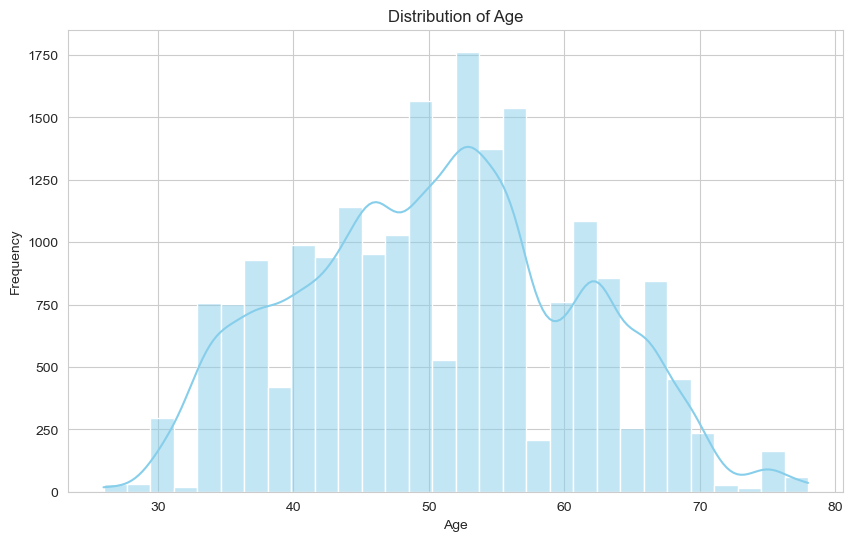

In [40]:
# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<Figure size 1200x800 with 0 Axes>

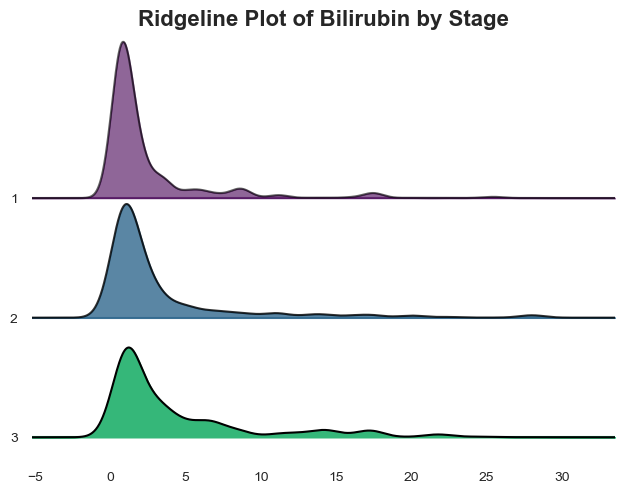

In [41]:
import joypy

plt.figure(figsize=(12, 8))
joypy.joyplot(data=df, by='Stage', column='Bilirubin', colormap=plt.cm.viridis, fade=True)
plt.title('Ridgeline Plot of Bilirubin by Stage', fontsize=16, fontweight='bold')
plt.show()

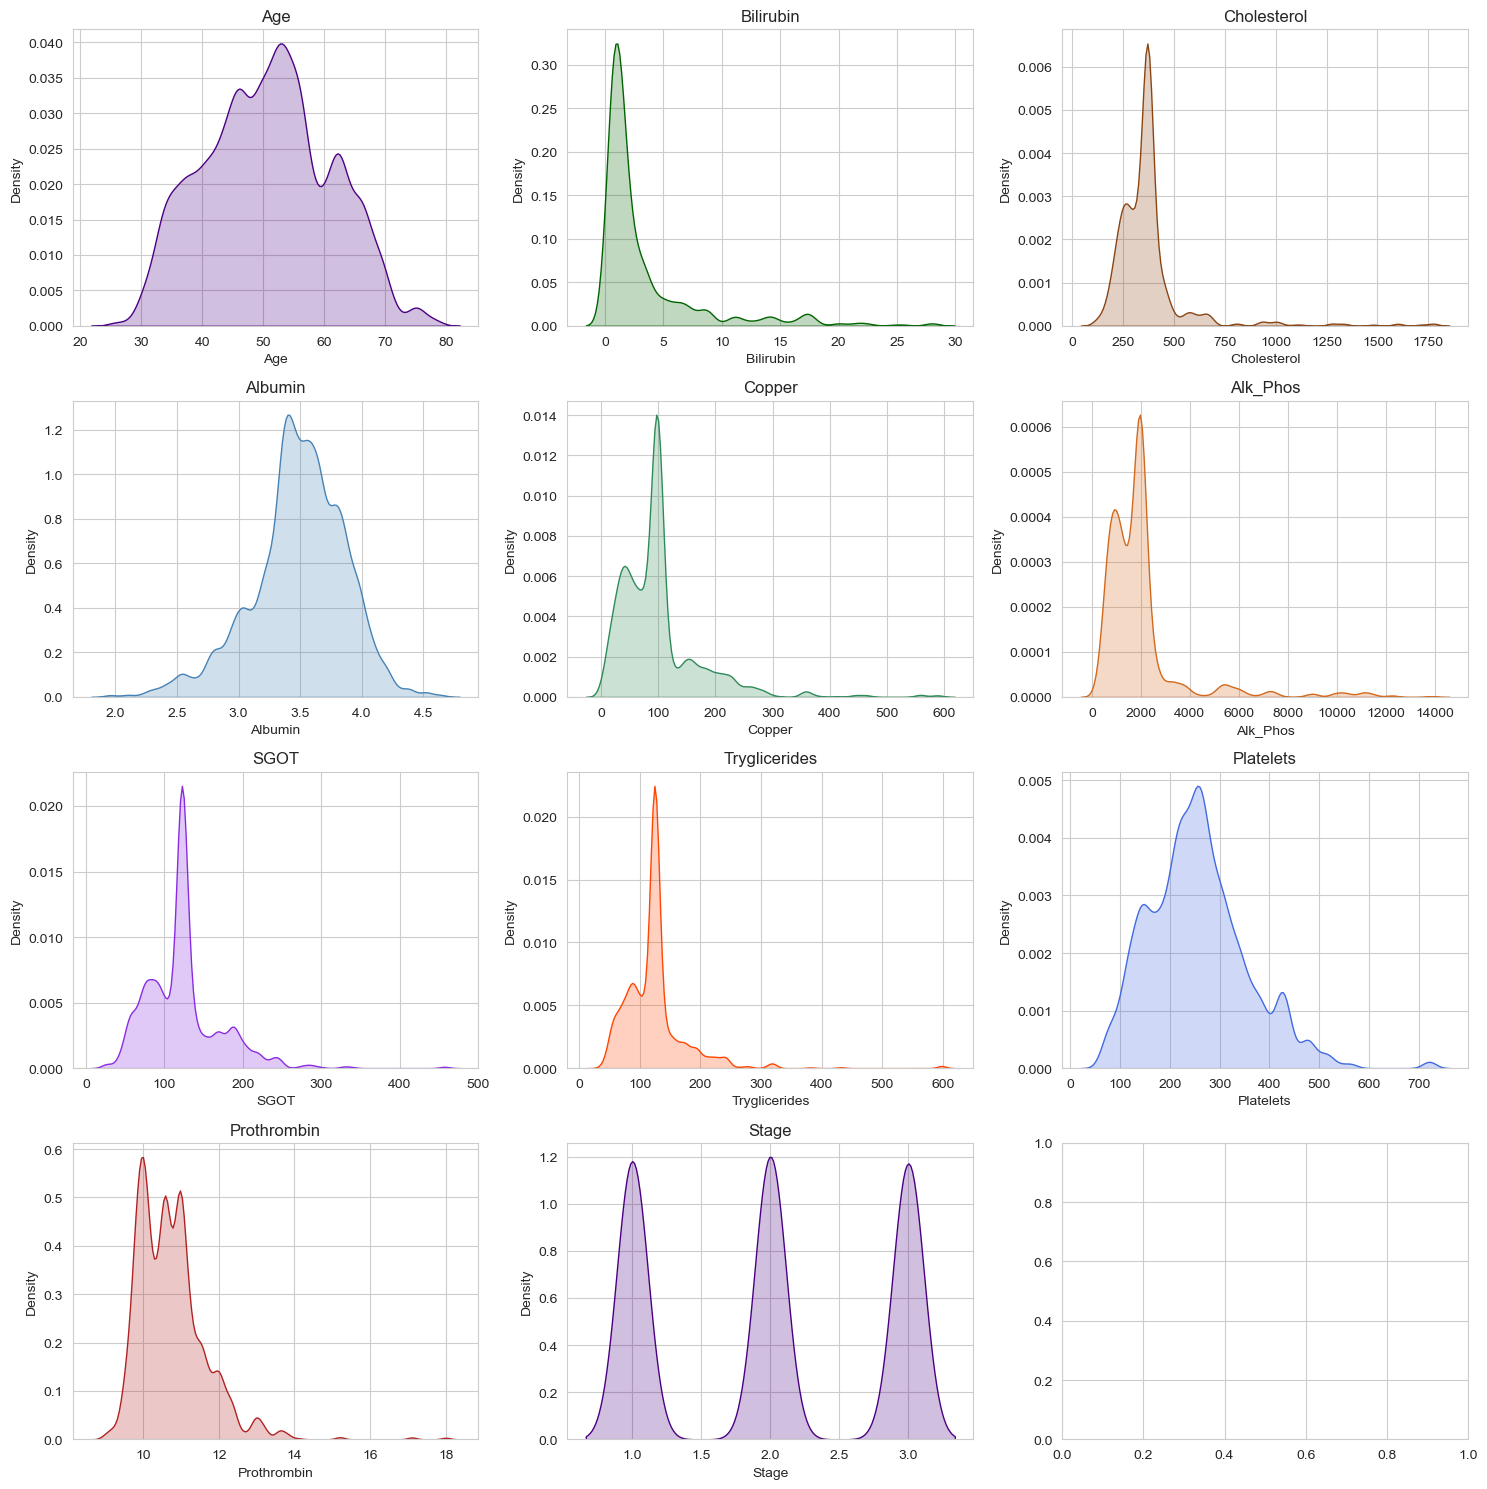

In [42]:
# Define color palette
colors = ['#4B0082', '#006400', '#8B4513', '#4682B4', '#2E8B57', '#D2691E', '#8A2BE2', '#FF4500', '#4169E1', '#B22222']

columns = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
num_rows = 4
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(columns):
    ax = axes[i]
    color = colors[i % len(colors)]  # Reuse colors if there are more columns than colors
    sns.kdeplot(data=df[column], ax=ax, fill=True, color=color)
    ax.set_title(column)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

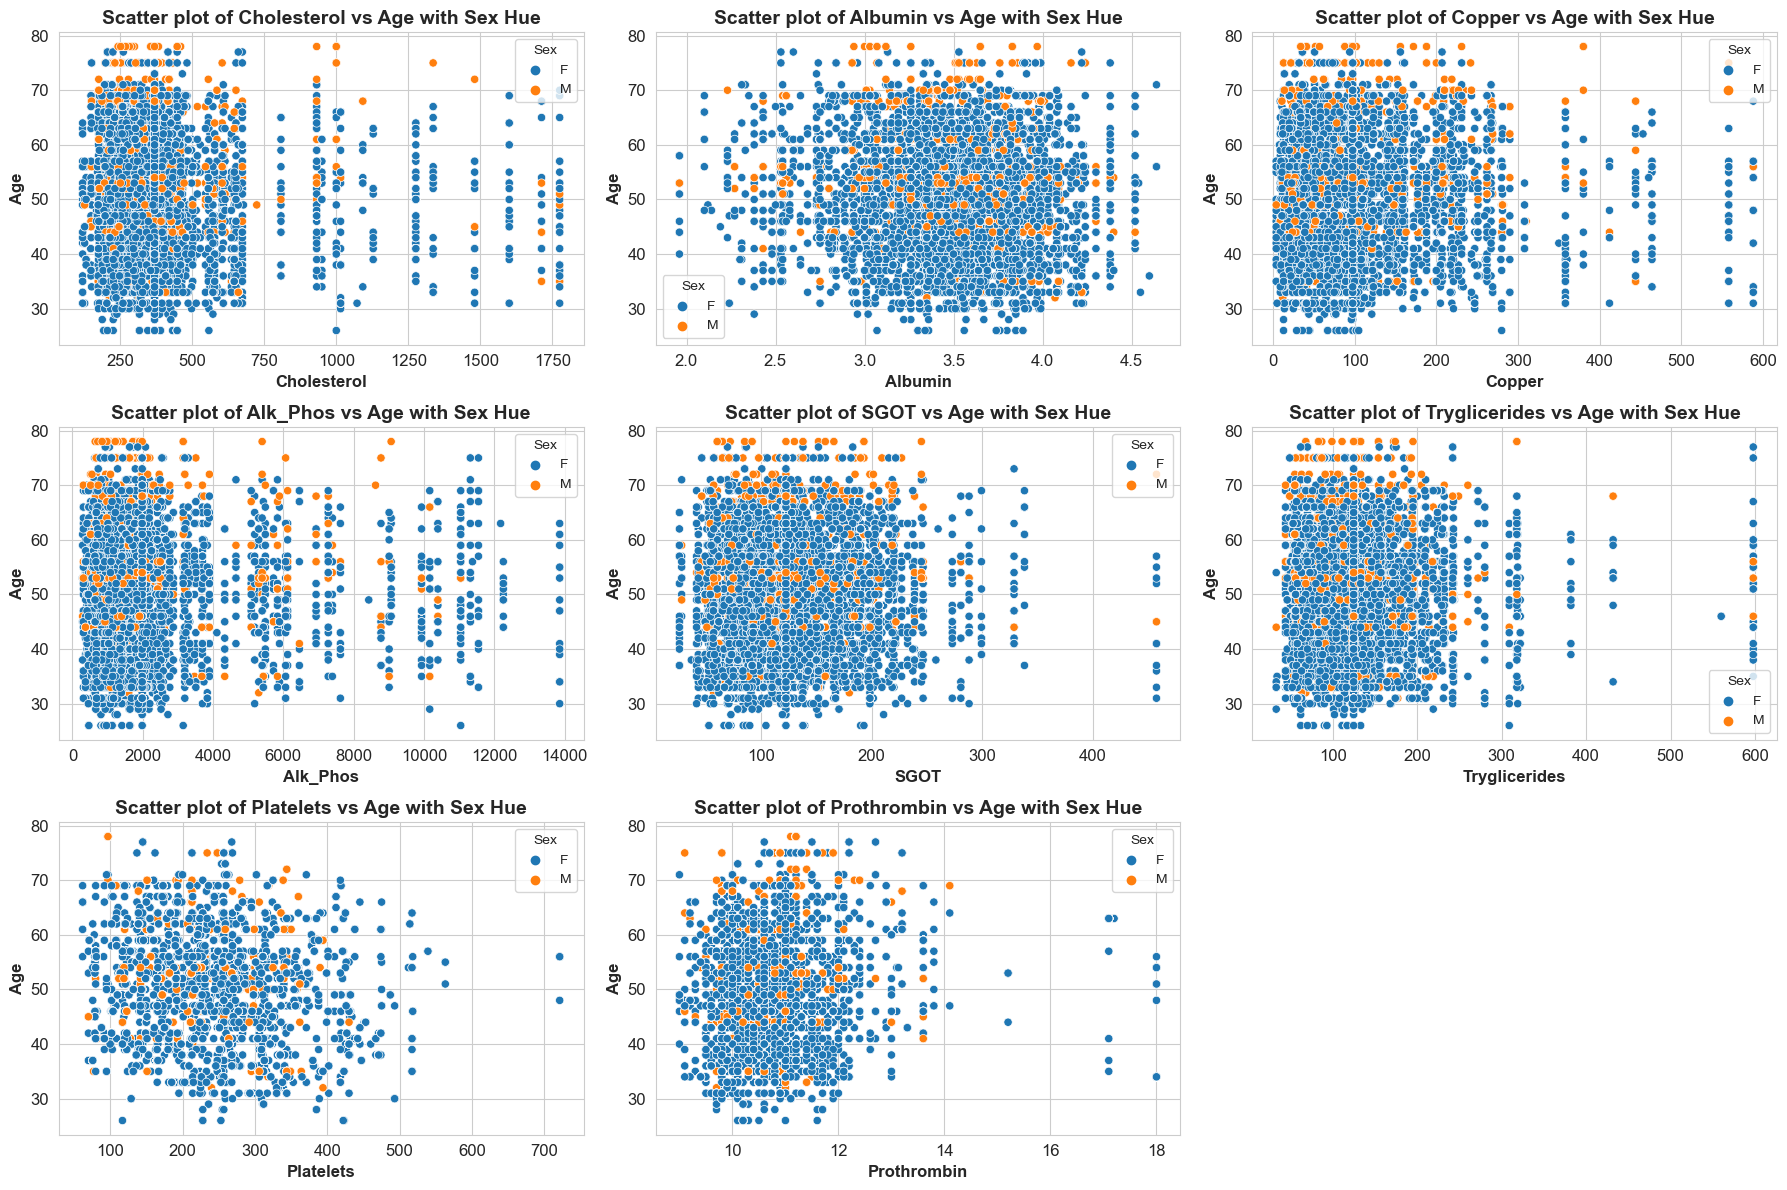

In [43]:
# Select the columns for bivariate analysis
bivariate_columns = ['Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Create a figure and subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot scatter plots for each pair of variables with 'Sex' as hue
for i, column in enumerate(bivariate_columns):
    sns.scatterplot(x=column, y='Age', hue='Sex', data=df, ax=axs[i])
    axs[i].set_title(f'Scatter plot of {column} vs Age with Sex Hue', fontsize=14, fontweight='bold')  # Increase font size and set title to bold
    axs[i].tick_params(axis='x', labelsize=12)
    axs[i].tick_params(axis='y', labelsize=12)
    axs[i].set_xlabel(column, fontsize=12, fontweight='bold')  # Increase font size and set xlabel to bold
    axs[i].set_ylabel('Age', fontsize=12, fontweight='bold')  # Increase font size and set ylabel to bold

# Hide any extra subplots if there are fewer than 12 variables
for j in range(len(bivariate_columns), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

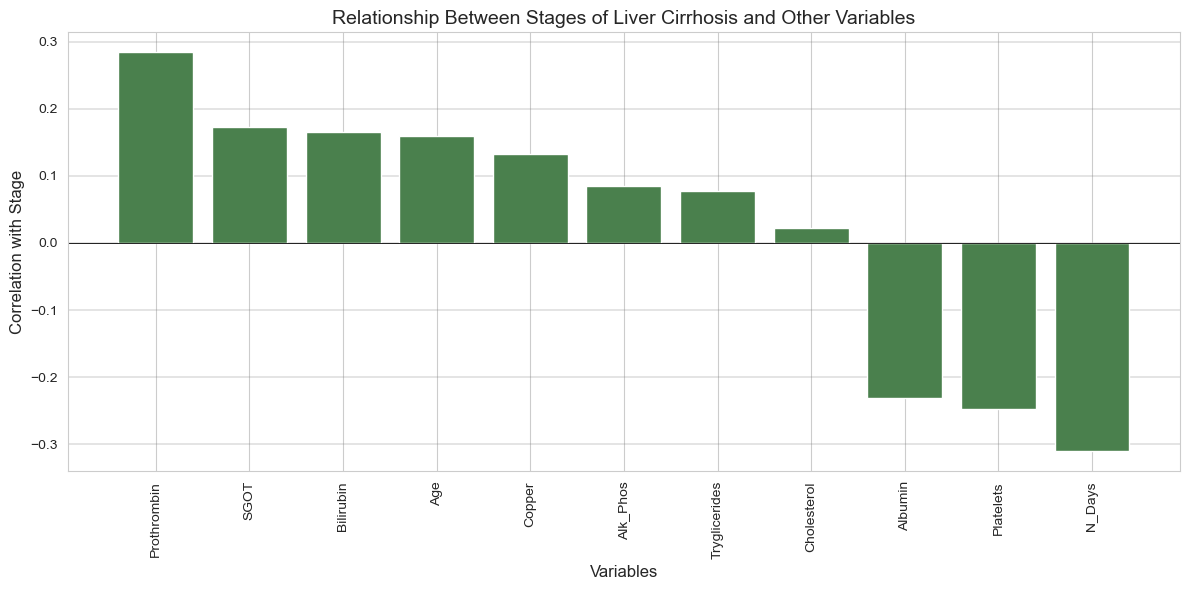

In [44]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation of 'Stage' with other numeric variables
stage_corr = numeric_df.corr()["Stage"].drop("Stage").sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.bar(stage_corr.index, stage_corr, color="#4a804d")
plt.xticks(rotation=90)
plt.axhline(0, color="k", lw=0.6)
plt.grid(True, axis="y", lw=0.3, color="gray")
plt.title("Relationship Between Stages of Liver Cirrhosis and Other Variables", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Correlation with Stage", fontsize=12)
plt.tight_layout()
plt.show()


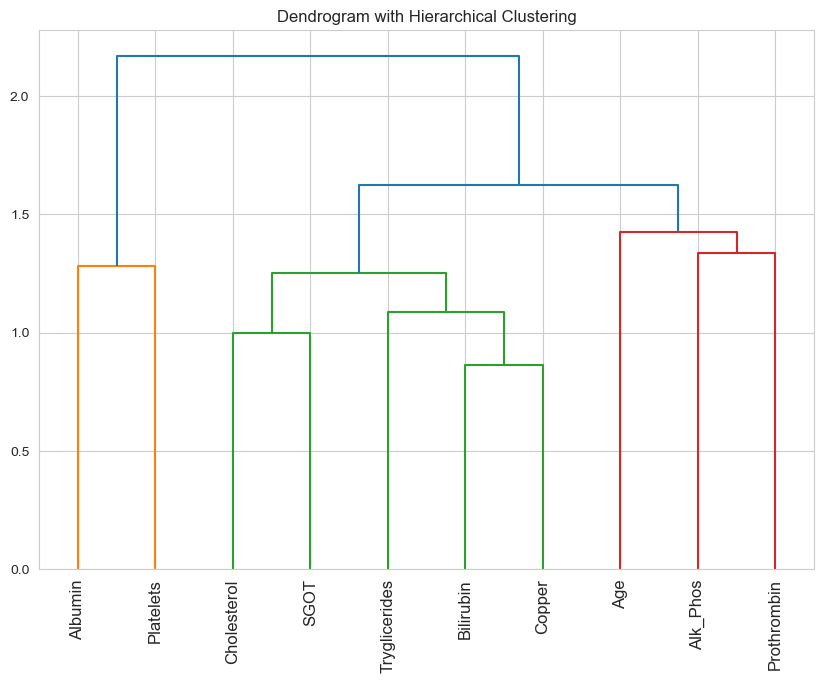

In [45]:
# Compute the correlation matrix
corr = df[['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']].corr()

# Generate the linkage matrix
link = linkage(corr, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(link, labels=corr.columns, leaf_rotation=90)
plt.title('Dendrogram with Hierarchical Clustering')
plt.show()

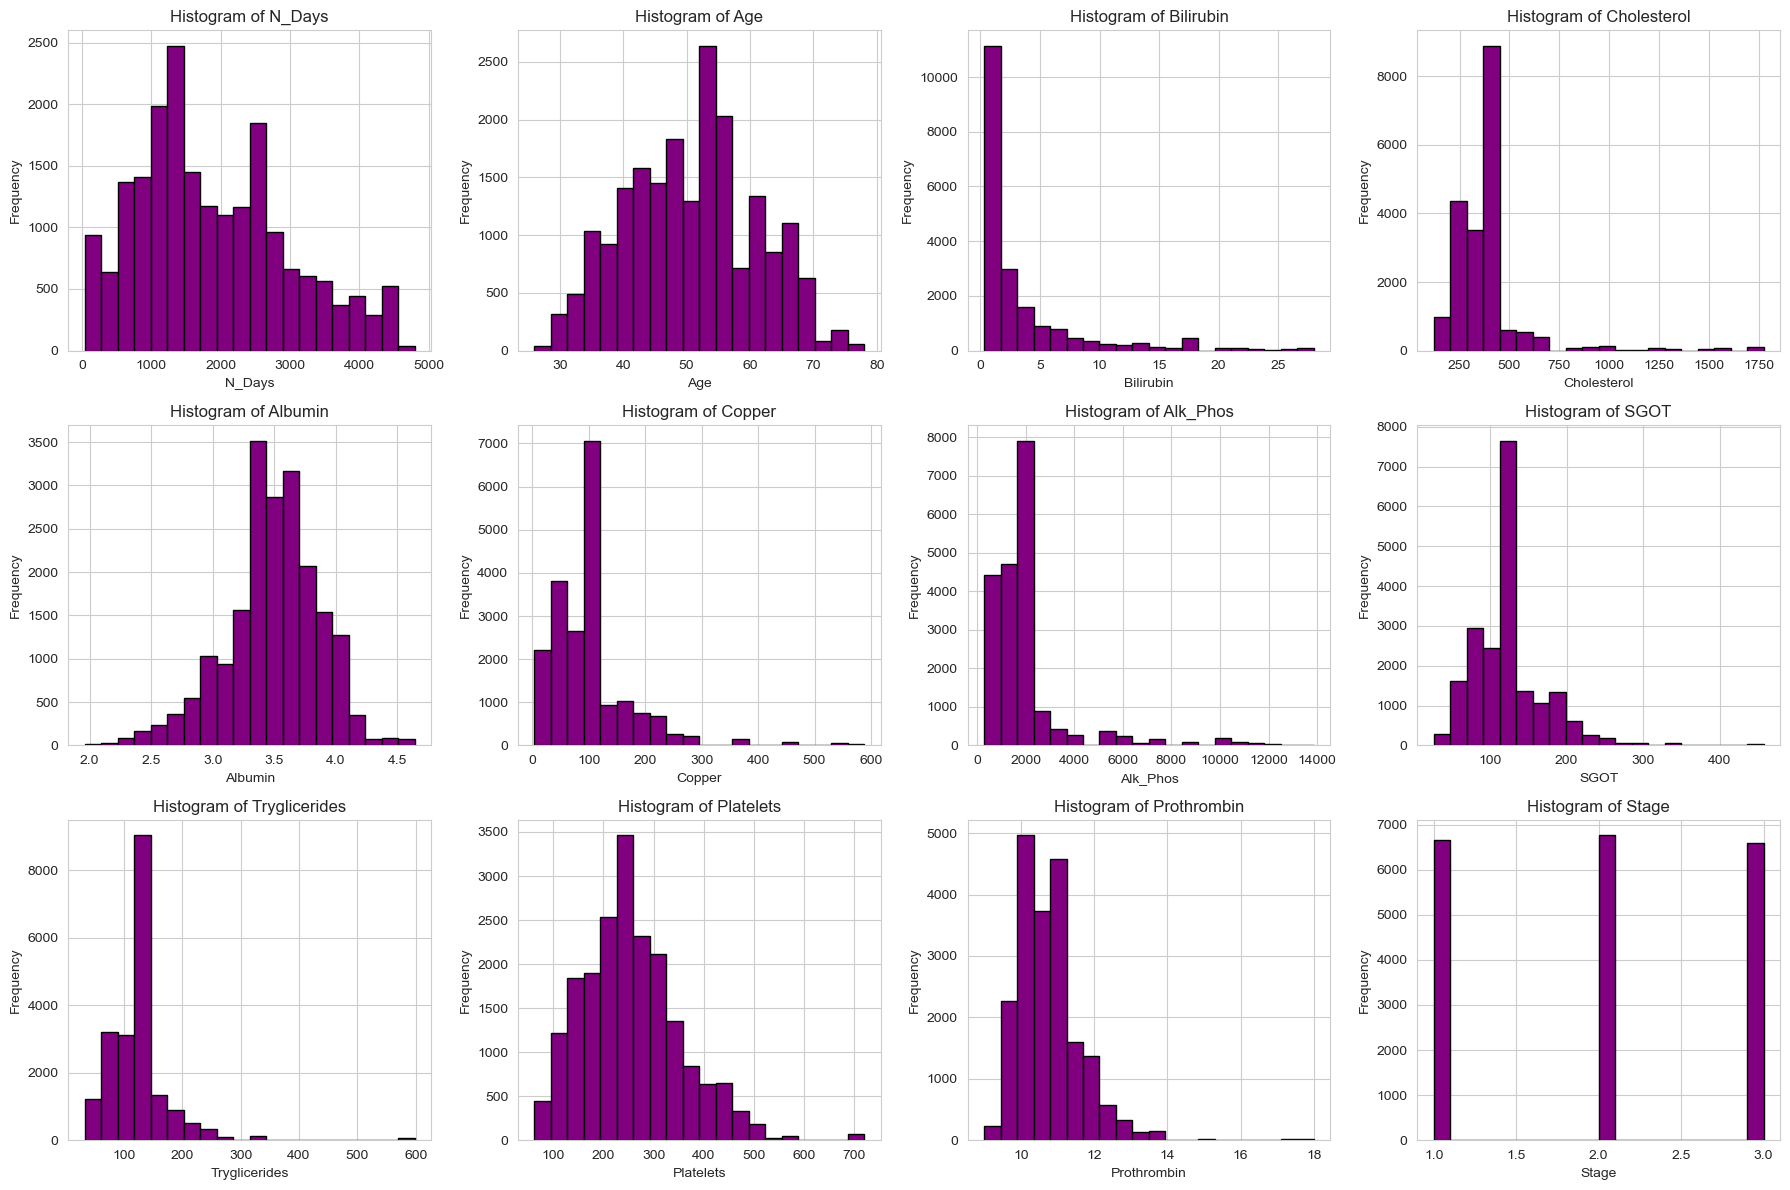

In [46]:
# Define the numeric columns
numeric_columns = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
                   'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

# Create subplots
fig, axs = plt.subplots(3, 4, figsize=(18, 12))

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plot histogram for each numeric variable
for i, column in enumerate(numeric_columns):
    axs[i].hist(df[column], bins=20, color='purple', edgecolor='black')
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

# Hide any extra subplots if there are fewer than 12 numeric columns
for j in range(len(numeric_columns), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

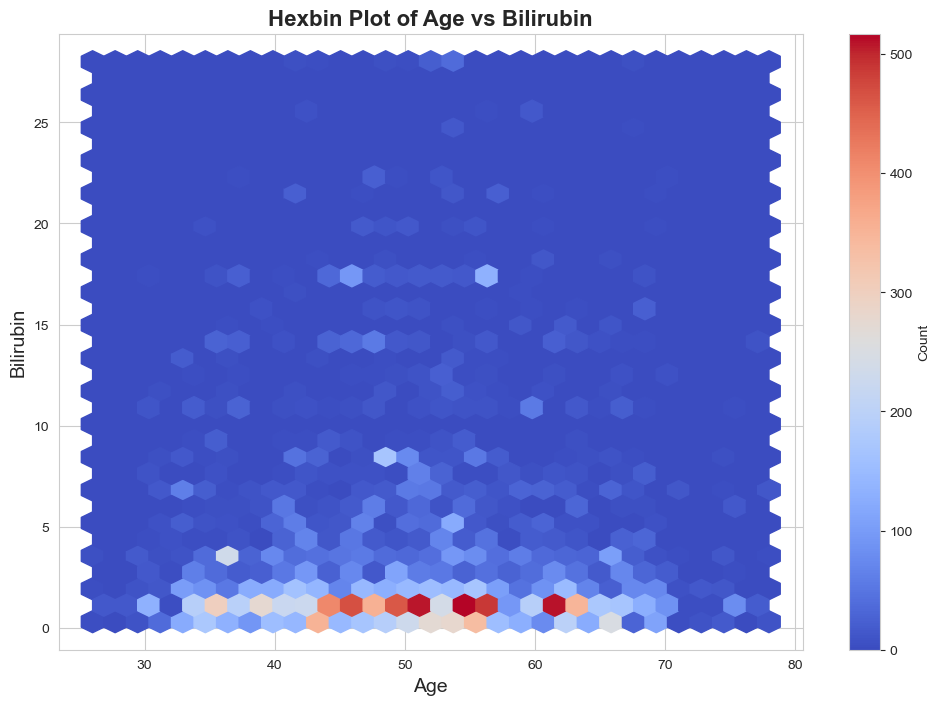

In [47]:
plt.figure(figsize=(12, 8))
plt.hexbin(df['Age'], df['Bilirubin'], gridsize=30, cmap='coolwarm')
plt.colorbar(label='Count')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Bilirubin', fontsize=14)
plt.title('Hexbin Plot of Age vs Bilirubin', fontsize=16, fontweight='bold')
plt.show()

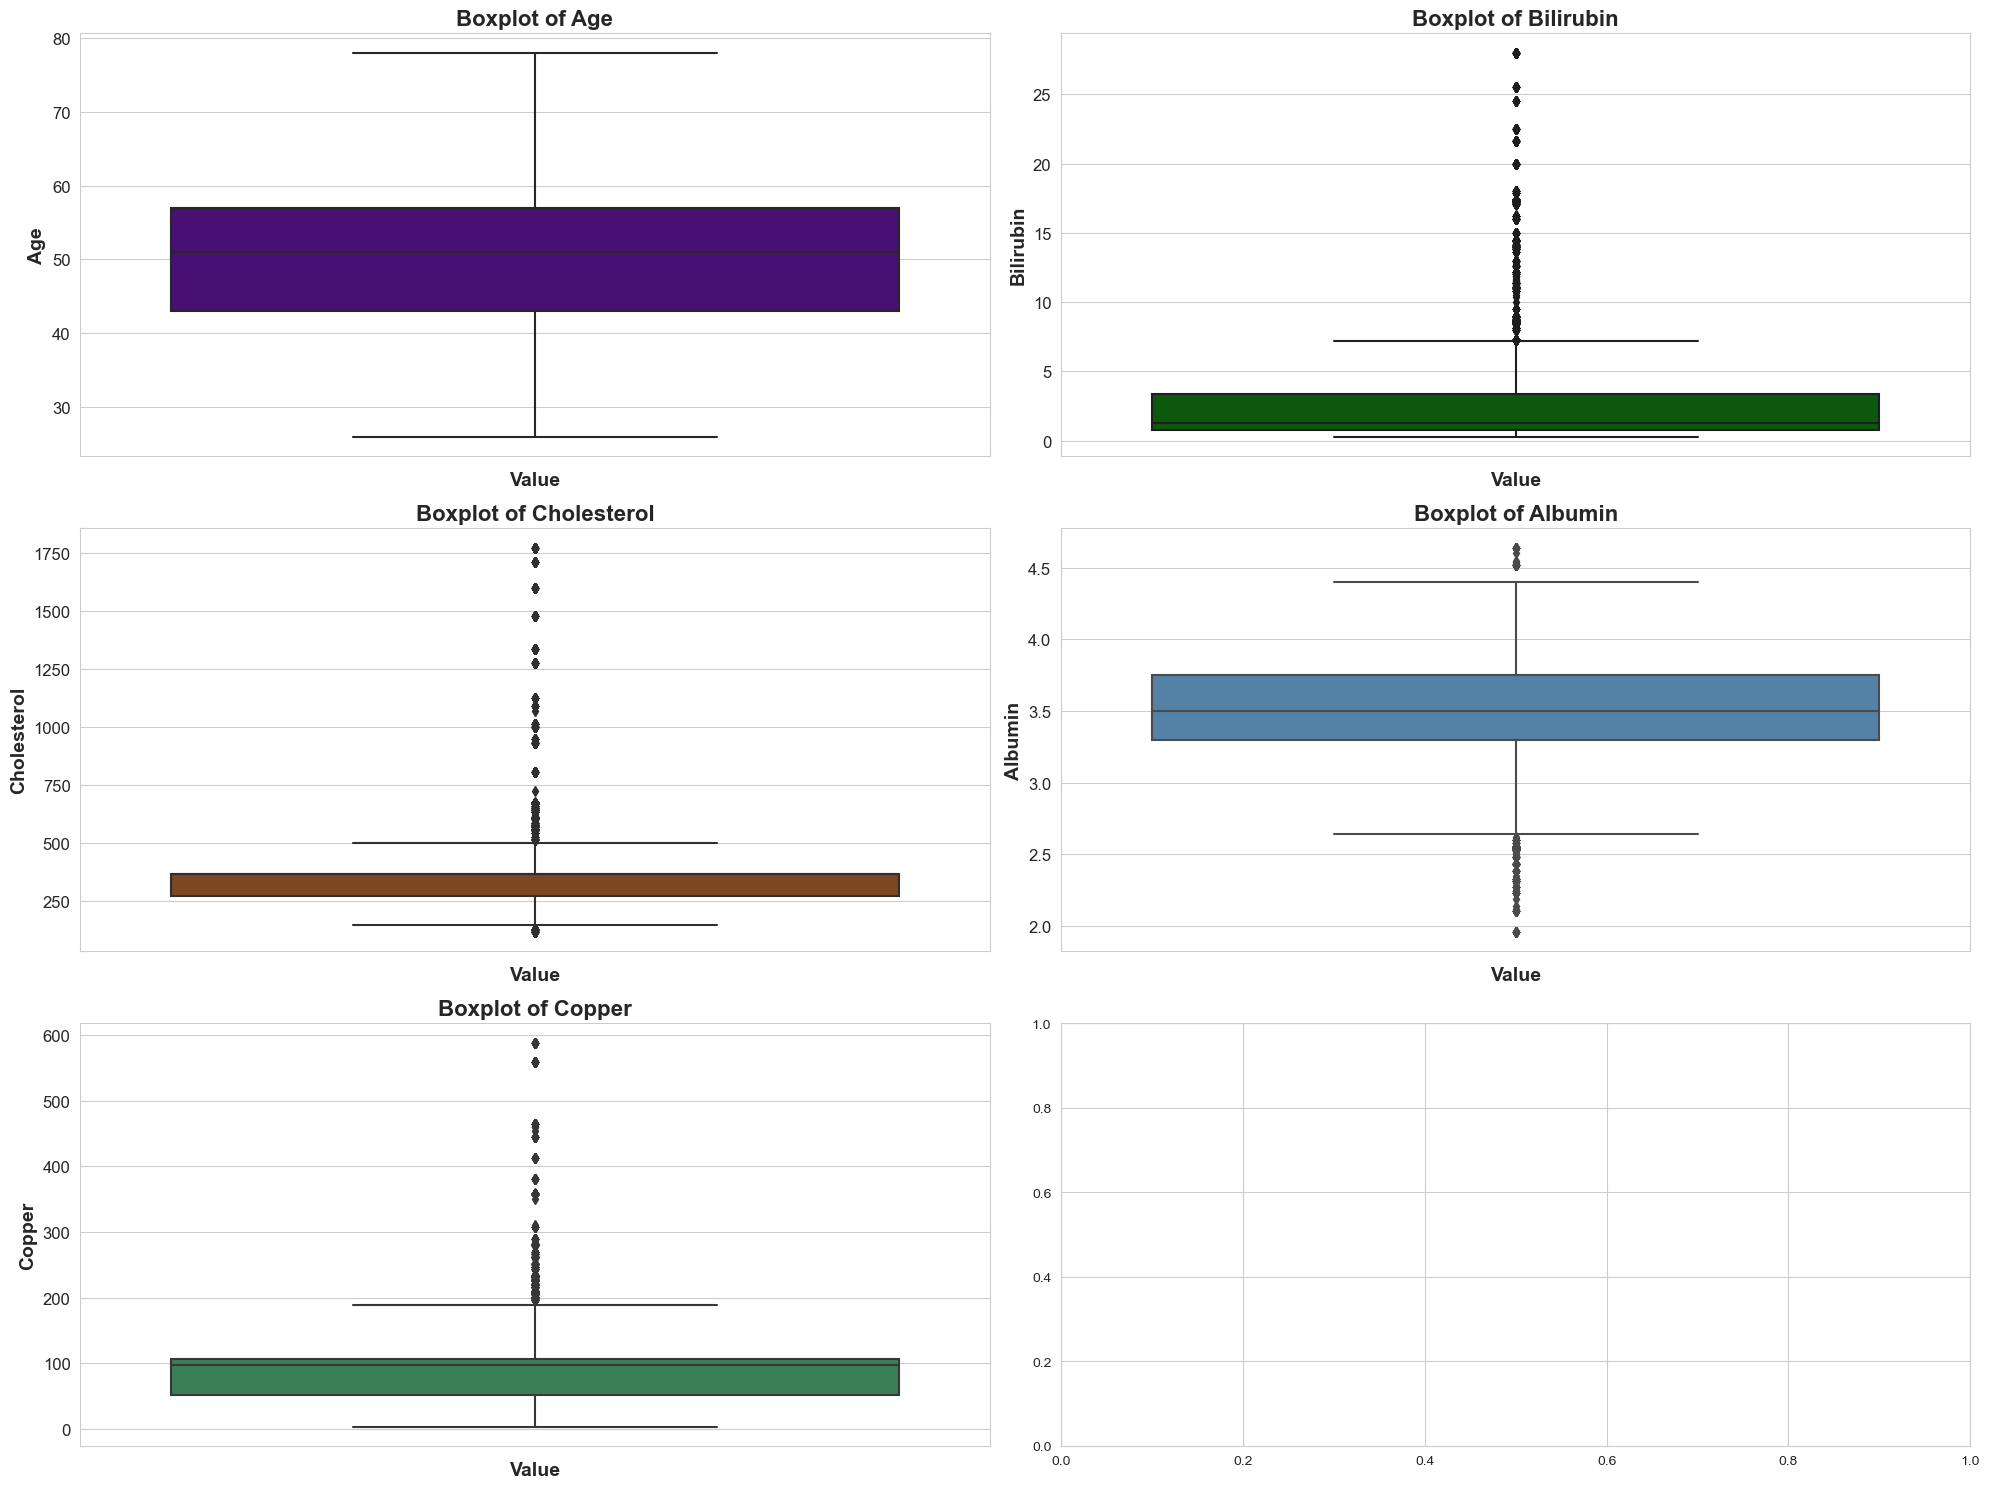

In [48]:
# Define colors
colors = ['#4B0082', '#006400', '#8B4513', '#4682B4', '#2E8B57', '#87CEEB', '#FFC0CB']

# Selecting columns
numerical_columns = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper']

# Set the style for seaborn
sns.set_style("whitegrid")

# Calculate the number of subplot rows needed for numerical columns
num_numerical_cols = len(numerical_columns)
num_subplot_rows = (num_numerical_cols + 1) // 2  # Ensure at least one row

# Create a figure and subplots
fig, axes = plt.subplots(num_subplot_rows, 2, figsize=(20, 5 * num_subplot_rows))

# Plot boxplots for numerical columns
for i, col in enumerate(numerical_columns):
    row_index = i // 2
    col_index = i % 2
    sns.boxplot(y=df[col], ax=axes[row_index, col_index], color=colors[i % len(colors)])  # Reuse colors if more numerical columns
    axes[row_index, col_index].set_title(f'Boxplot of {col}', fontsize=16, fontweight='bold')  # Increase font size and set title to bold
    axes[row_index, col_index].set_xlabel('Value', fontsize=14, fontweight='bold')  # Increase font size and set xlabel to bold
    axes[row_index, col_index].set_ylabel(col, fontsize=14, fontweight='bold')  # Increase font size and set ylabel to bold
    axes[row_index, col_index].tick_params(axis='both', labelsize=12)  # Increase tick label size

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


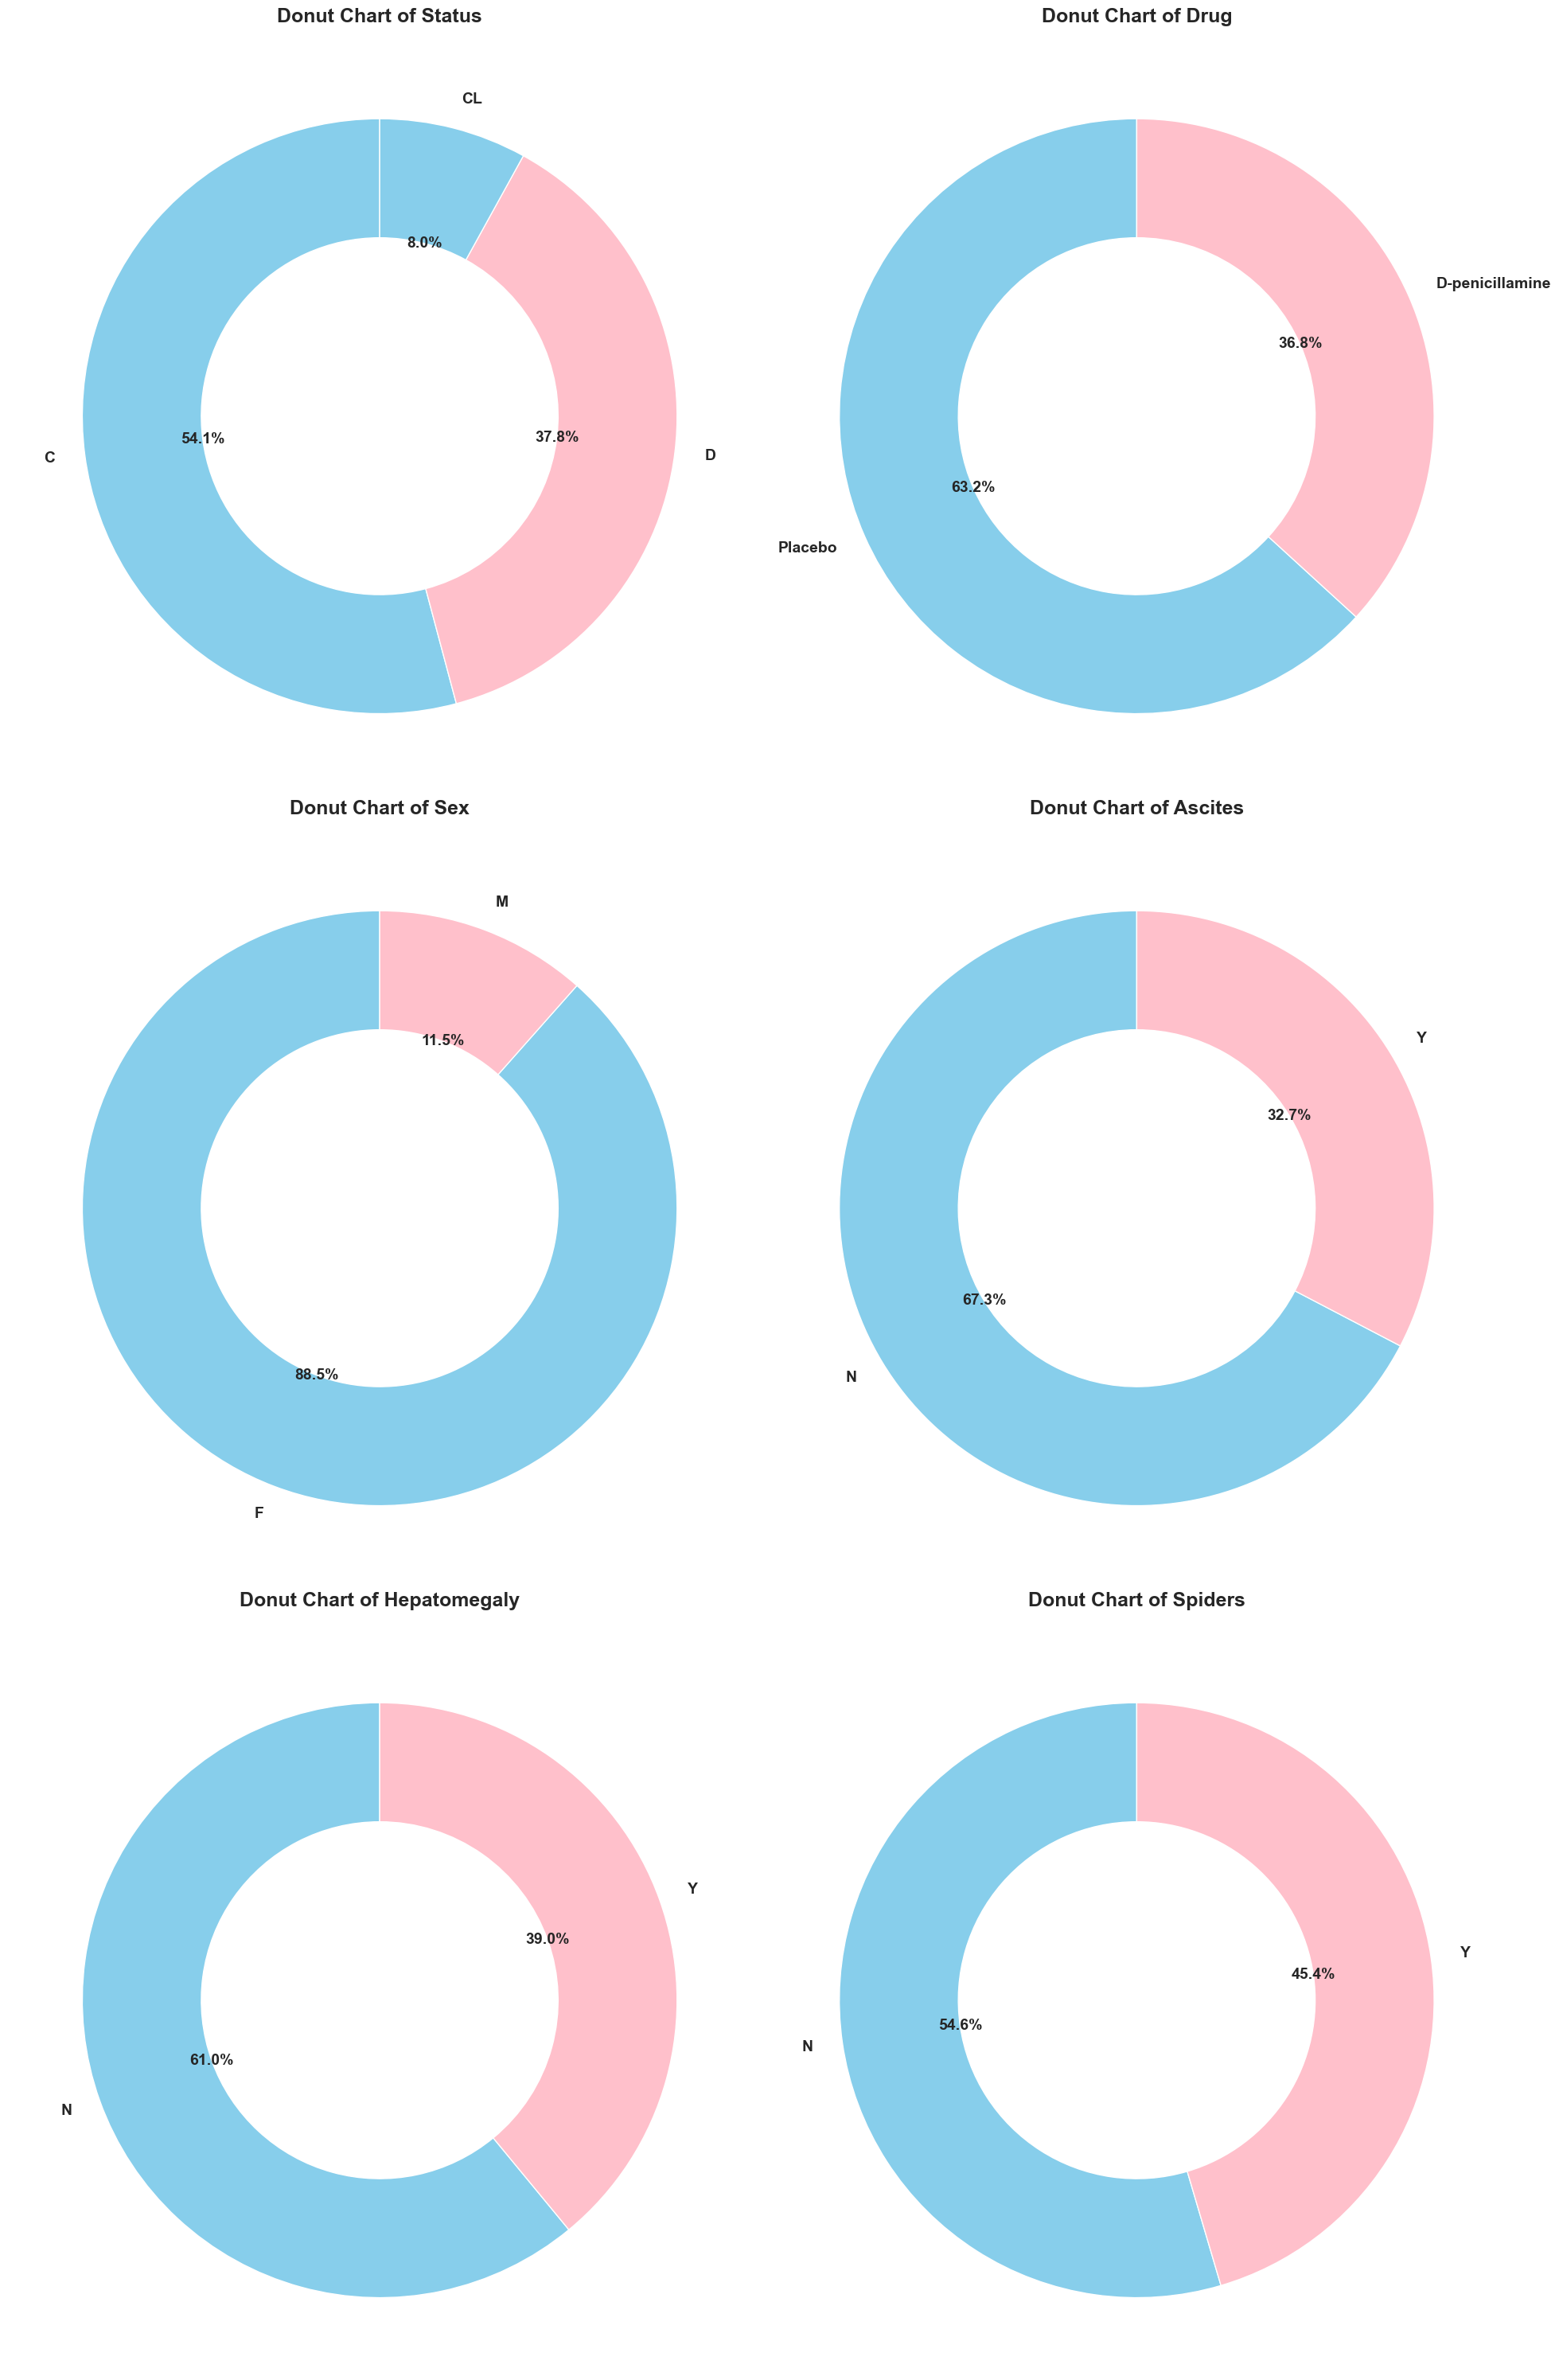

In [49]:
# Define colors
colors = ['#4B0082', '#006400', '#8B4513', '#4682B4', '#2E8B57', '#87CEEB', '#FFC0CB']

# Selecting columns
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders']

# Set the style for seaborn
sns.set_style("whitegrid")

# Calculate the number of subplot rows needed for categorical columns
num_categorical_cols = len(categorical_columns)
num_subplot_rows = (num_categorical_cols + 1) // 2  # Ensure at least one row

# Create a figure and subplots
fig, axes = plt.subplots(num_subplot_rows, 2, figsize=(20, 10 * num_subplot_rows))

# Plot donut charts for categorical columns
for i, col in enumerate(categorical_columns):
    row_index = i // 2
    col_index = i % 2
    category_counts = df[col].value_counts()
    category_labels = category_counts.index
    category_sizes = category_counts.values
    pie_colors = ['#87CEEB', '#FFC0CB']  # Light blue and light pink colors
    wedges, texts, autotexts = axes[row_index, col_index].pie(
        category_sizes, labels=category_labels, autopct='%1.1f%%', startangle=90,
        colors=pie_colors, wedgeprops=dict(width=0.4, edgecolor='w')
    )
    axes[row_index, col_index].set_title(f'Donut Chart of {col}', fontsize=18, fontweight='bold', pad=20)  # Increase font size, set title to bold, and add padding
    for text in texts + autotexts:
        text.set_fontweight('bold')  # Set labels and percentages to bold
        text.set_size(14)  # Increase font size

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


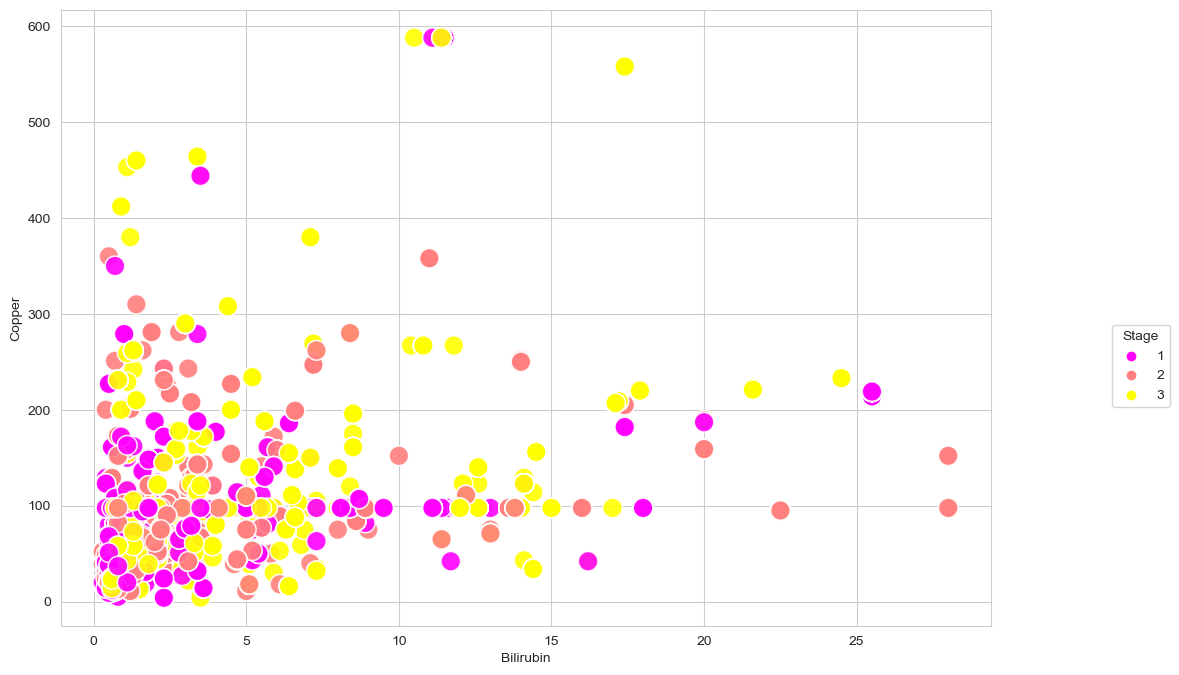

In [50]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='Bilirubin',y='Copper',data=df,hue='Stage',s=200,alpha=0.9,palette='spring')
plt.legend(bbox_to_anchor=(1.2,0.5),title="Stage")

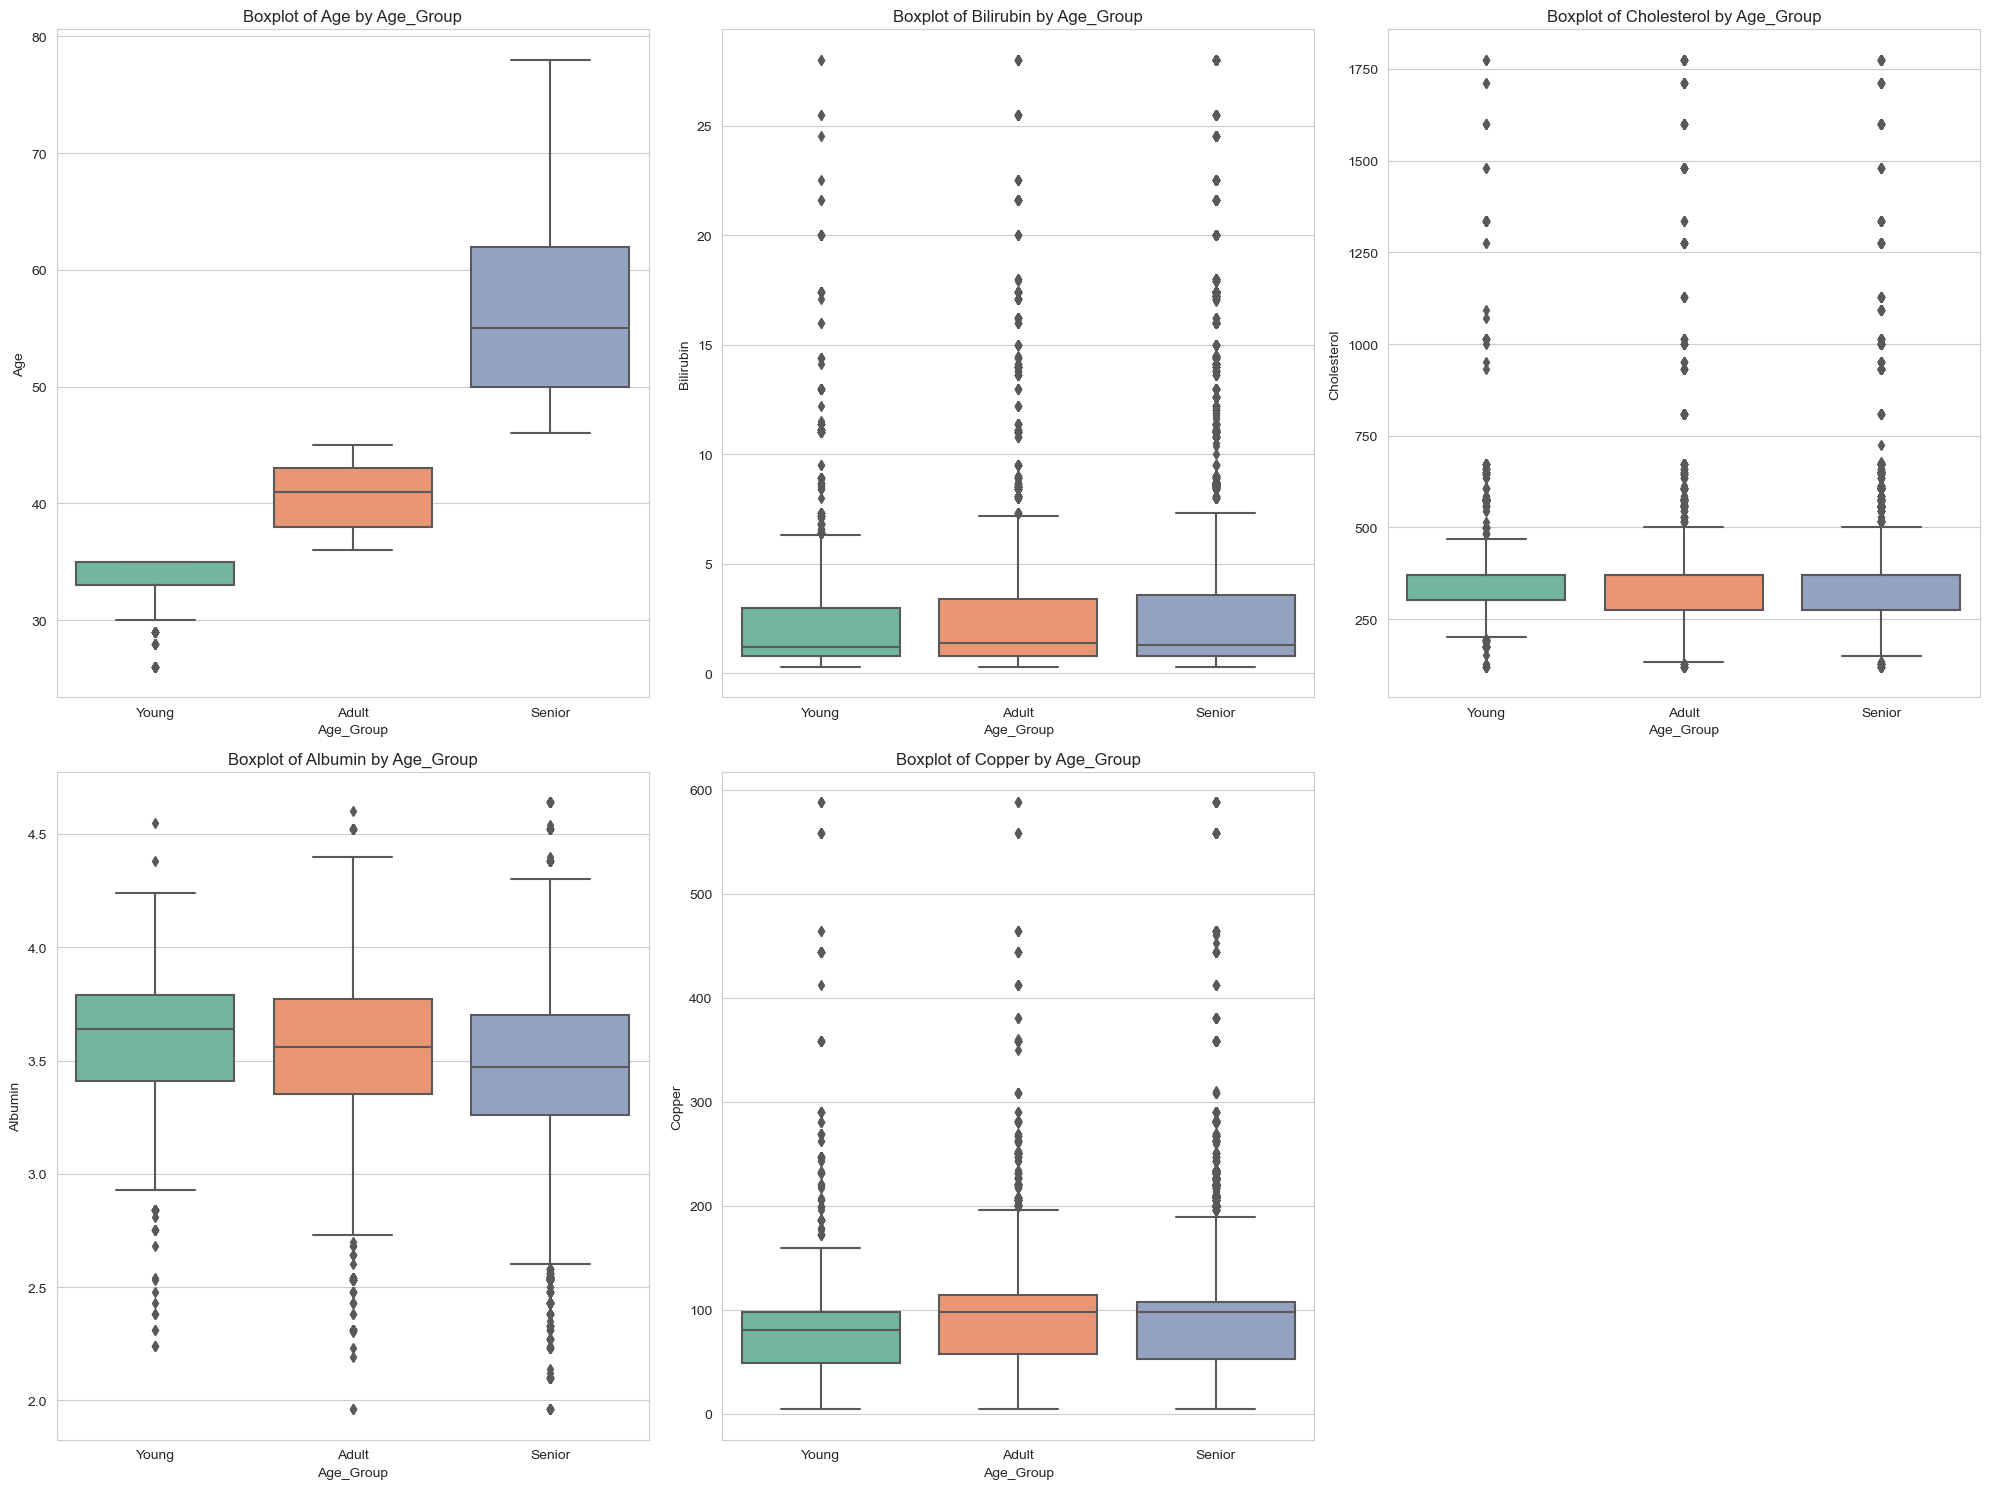

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the numerical and categorical variables
numerical_columns = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper']
categorical_column = 'Age_Group'  # The categorical variable for comparison

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Create boxplots for each numerical variable
for i, num_col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Arrange plots in a 2x3 grid
    sns.boxplot(x=categorical_column, y=num_col, data=df, palette='Set2')
    plt.title(f'Boxplot of {num_col} by {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel(num_col)

plt.tight_layout()
plt.show()


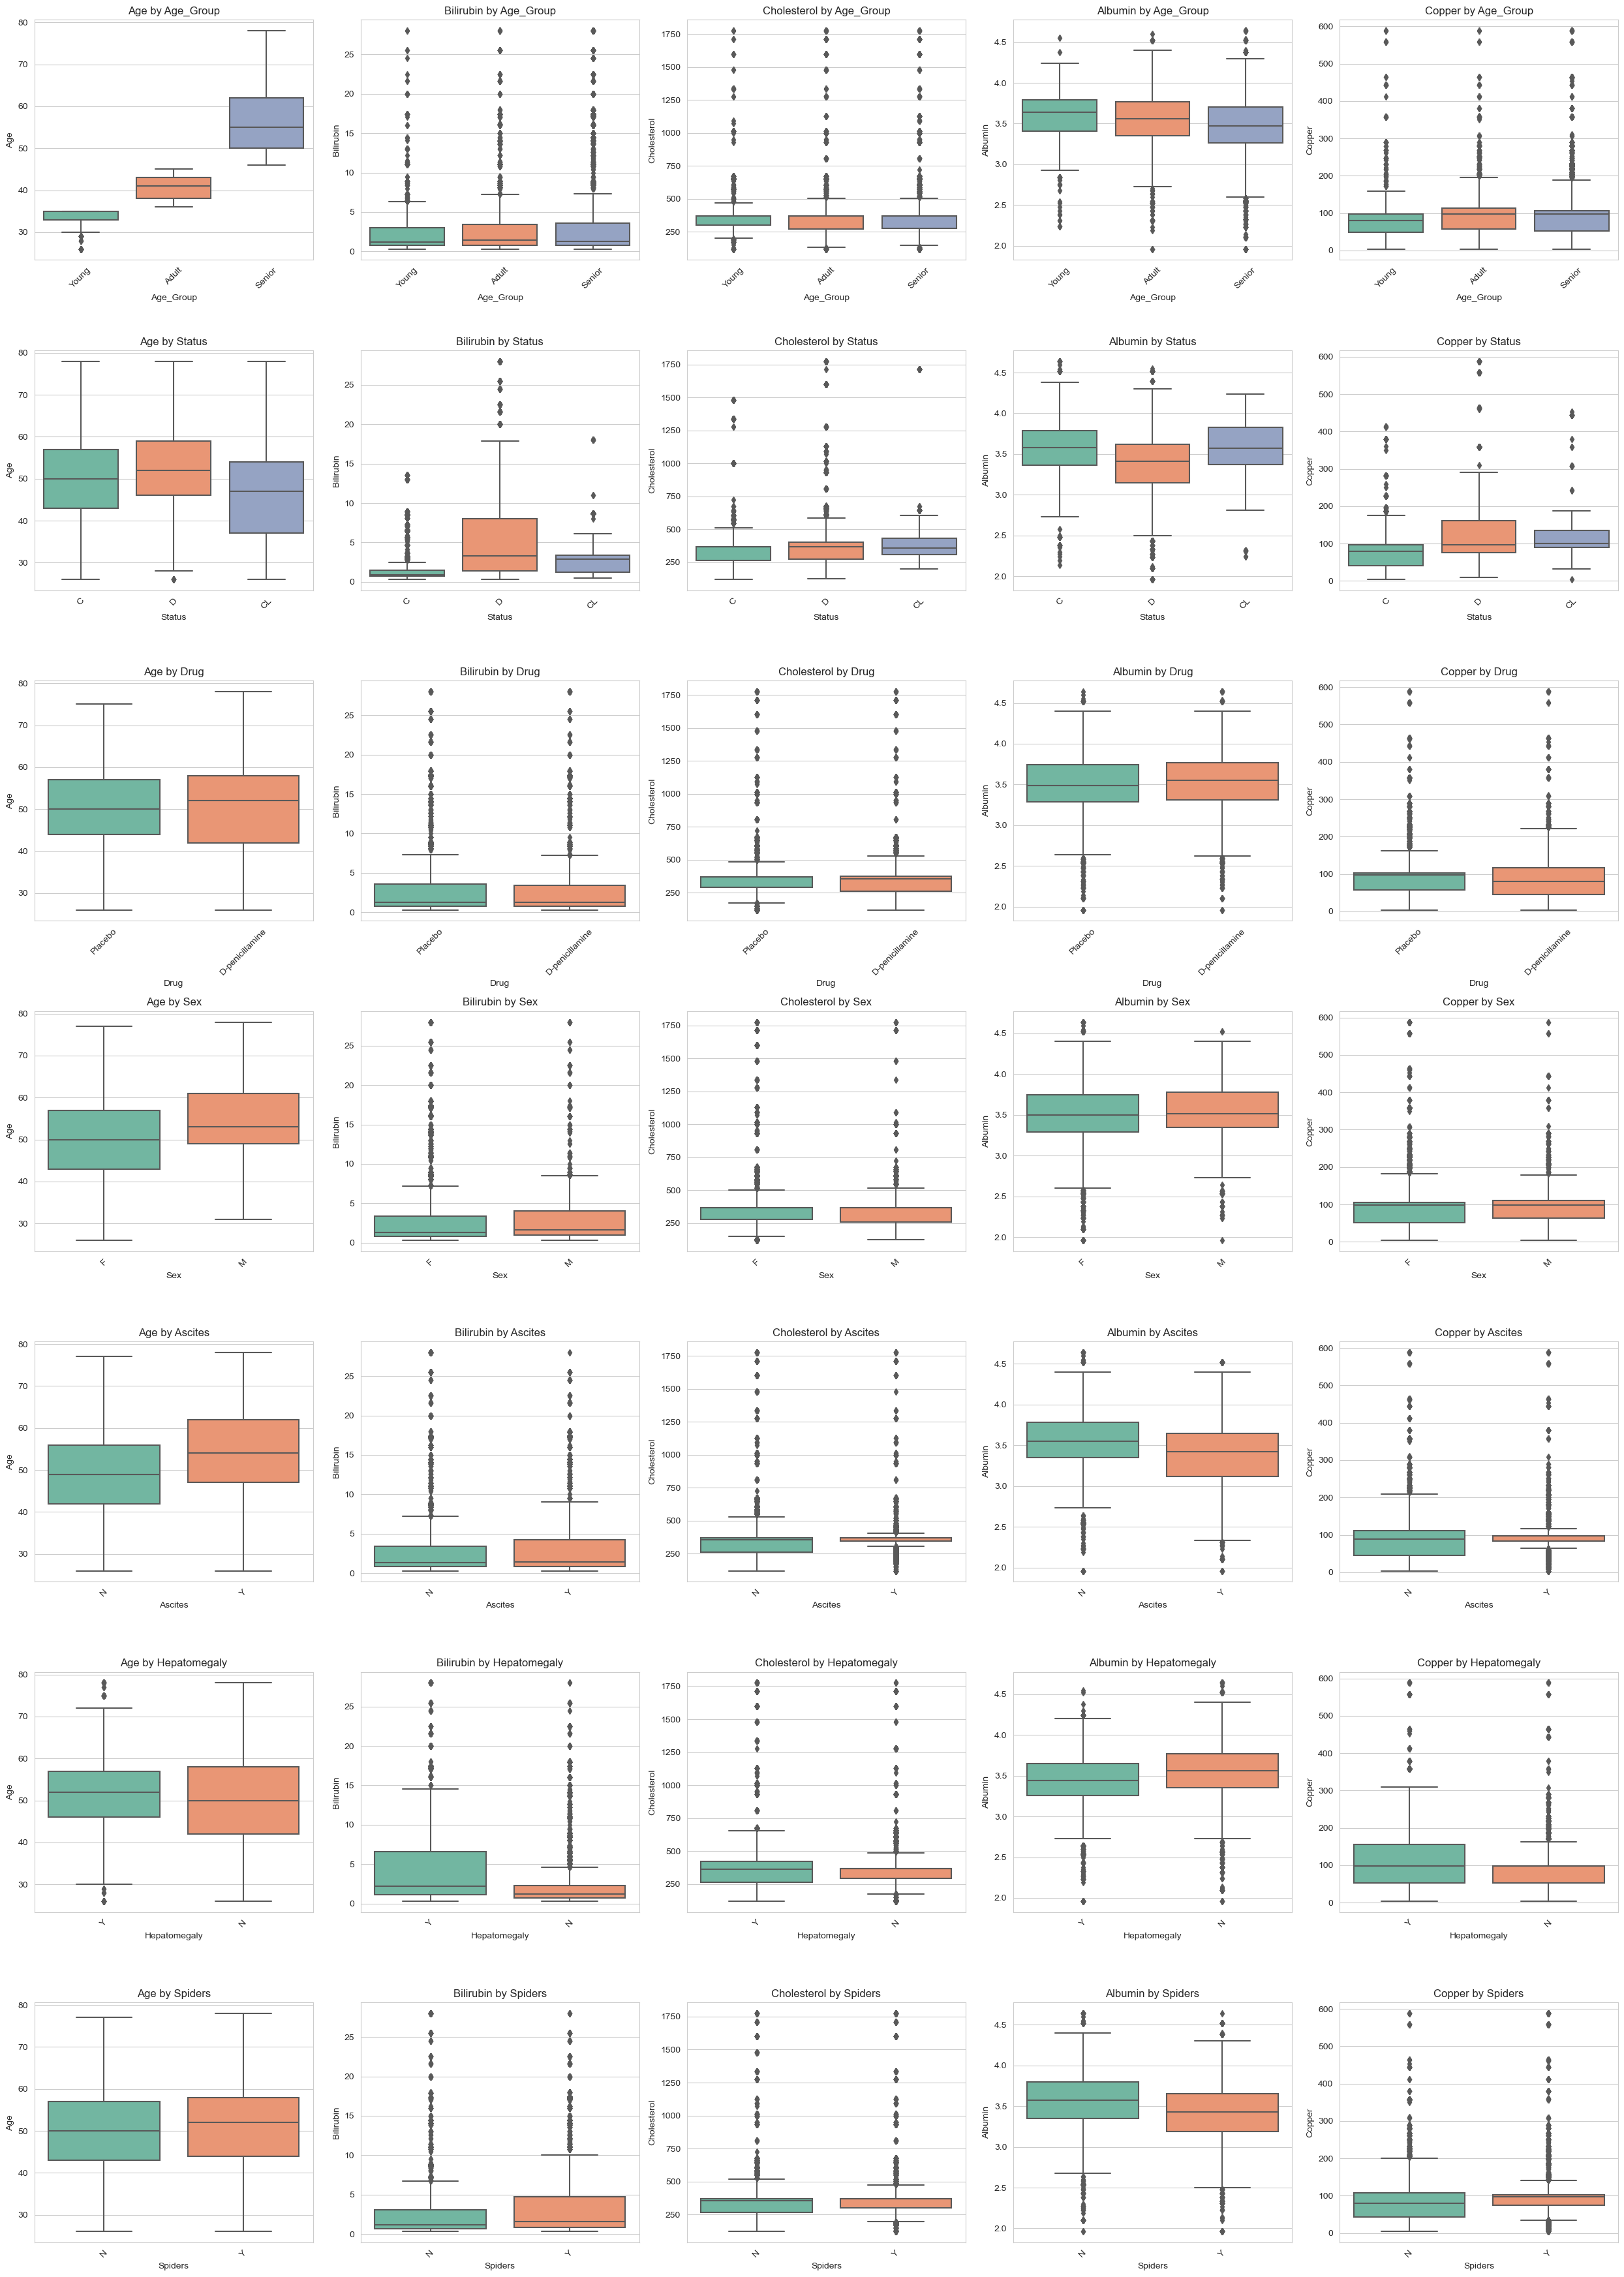

In [52]:
# Define the numerical and categorical variables
numerical_columns = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper']
categorical_columns = ['Age_Group', 'Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders']  # List of categorical variables

# Set up the matplotlib figure
num_rows = len(categorical_columns)
num_cols = len(numerical_columns)
plt.figure(figsize=(num_cols * 5, num_rows * 5))

# Create boxplots for each combination of numerical and categorical variables
for i, cat_col in enumerate(categorical_columns):
    for j, num_col in enumerate(numerical_columns):
        plt.subplot(num_rows, num_cols, i * num_cols + j + 1)
        sns.boxplot(x=cat_col, y=num_col, data=df, palette='Set2')
        plt.title(f'{num_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

plt.tight_layout()
plt.show()


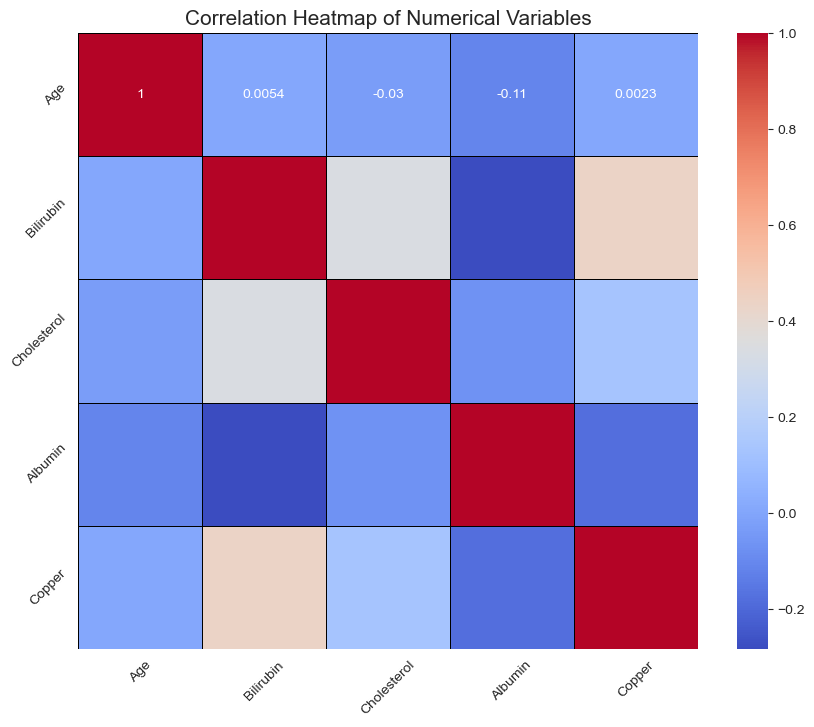

In [53]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')

# Title and labels
plt.title('Correlation Heatmap of Numerical Variables', size=15)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Display the heatmap
plt.show()


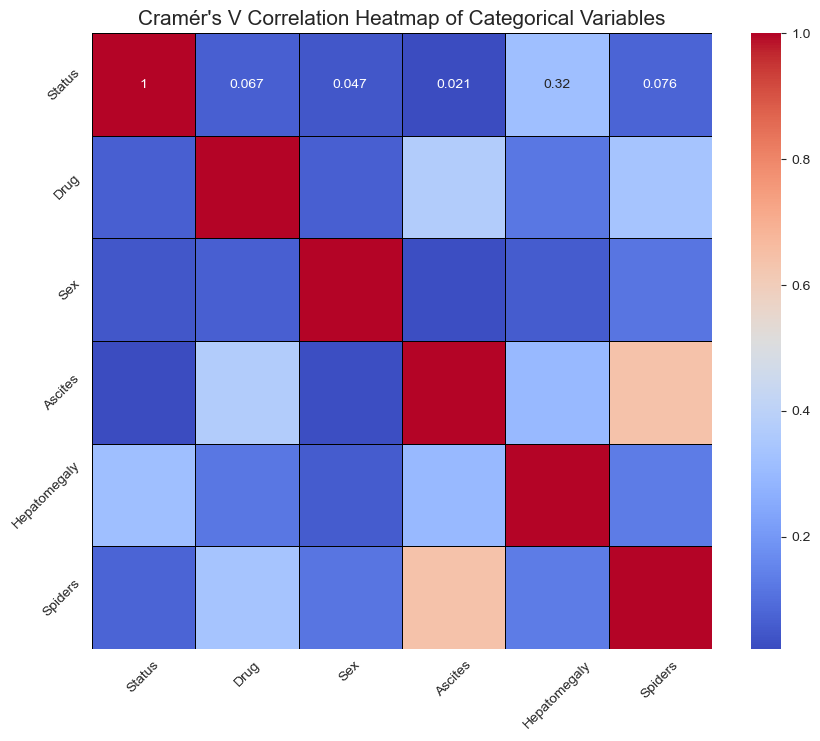

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.values.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / n
    kcorr = k - ((k-1)**2) / n
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Create a correlation matrix for categorical variables
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders']
correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            correlation_matrix.loc[col1, col2] = 1.0
        else:
            confusion_matrix = pd.crosstab(df[col1], df[col2])
            correlation_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

correlation_matrix = correlation_matrix.astype(float)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')

# Title and labels
plt.title('Cramér\'s V Correlation Heatmap of Categorical Variables', size=15)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Display the heatmap
plt.show()


In [55]:
from scipy.stats import pointbiserialr

def point_biserial_corr(numerical_col, categorical_col):
    """Calculate Point Biserial Correlation between a numerical and binary categorical variable."""
    binary_col = pd.get_dummies(categorical_col, drop_first=True)
    if binary_col.shape[1] != 1:
        raise ValueError("The categorical variable must be binary for Point Biserial Correlation.")
    return pointbiserialr(numerical_col, binary_col.iloc[:, 0])[0]

# Numerical and categorical columns
numerical_columns = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper']
categorical_columns = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders']

# Compute Point Biserial Correlation for each pair of numerical and binary categorical variables
print("Point Biserial Correlation:")
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        if df[cat_col].nunique() == 2:  # Ensure the categorical column is binary
            corr = point_biserial_corr(df[num_col], df[cat_col])
            print(f'Point Biserial Correlation between {num_col} and {cat_col}:', corr)


Point Biserial Correlation:
Point Biserial Correlation between Age and Drug: -0.007680445722168413
Point Biserial Correlation between Age and Sex: 0.1317006659586734
Point Biserial Correlation between Age and Ascites: 0.19444654061893135
Point Biserial Correlation between Age and Hepatomegaly: 0.051654808148868185
Point Biserial Correlation between Age and Spiders: 0.027864985524394842
Point Biserial Correlation between Bilirubin and Drug: 0.04690585625199918
Point Biserial Correlation between Bilirubin and Sex: 0.0022278405553704276
Point Biserial Correlation between Bilirubin and Ascites: 0.060952822226592235
Point Biserial Correlation between Bilirubin and Hepatomegaly: 0.2639288968607294
Point Biserial Correlation between Bilirubin and Spiders: 0.12117835747738748
Point Biserial Correlation between Cholesterol and Drug: 0.00927134075622104
Point Biserial Correlation between Cholesterol and Sex: -0.012136648048314807
Point Biserial Correlation between Cholesterol and Ascites: -0.009

In [56]:
from scipy.stats import f_oneway

def anova_test(numerical_col, categorical_col):
    """Perform ANOVA to test if there are significant differences in means of the numerical variable across categories."""
    categories = categorical_col.unique()
    groups = [numerical_col[categorical_col == category] for category in categories]
    return f_oneway(*groups).pvalue

# Perform ANOVA for each pair of numerical and categorical variables
print("\nANOVA Test Results:")
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        if df[cat_col].nunique() > 2:  # Use ANOVA for categorical columns with more than two categories
            p_value = anova_test(df[num_col], df[cat_col])
            print(f'ANOVA p-value between {num_col} and {cat_col}:', p_value)



ANOVA Test Results:
ANOVA p-value between Age and Status: 7.779300842872081e-84
ANOVA p-value between Bilirubin and Status: 0.0
ANOVA p-value between Cholesterol and Status: 4.5534776936843396e-107
ANOVA p-value between Albumin and Status: 2.0494727e-317
ANOVA p-value between Copper and Status: 0.0


In [57]:
males = df[df.Sex == 'M']
females = df[df.Sex == 'F']

In [58]:
males.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000
mean,1878.706239,54.399480,3.426213,365.821626,3.514363,107.291256,2134.880817,123.203352,124.863472,230.502908,10.841984,2.129549
std,1204.662561,10.146685,4.329874,182.307299,0.366738,75.513969,1799.768963,47.031124,56.294557,83.237995,0.780651,0.789030
min,41.000000,31.000000,0.300000,127.000000,1.960000,4.000000,289.000000,28.380000,33.000000,70.000000,9.100000,1.000000
25%,1067.000000,49.000000,1.000000,260.000000,3.350000,63.000000,1070.000000,86.800000,91.000000,166.000000,10.200000,1.000000
50%,1478.000000,53.000000,1.600000,369.510563,3.515000,97.648387,1982.655769,122.556346,124.702128,217.000000,10.900000,2.000000
75%,2516.500000,61.000000,4.000000,370.000000,3.780000,110.000000,1982.655769,137.950000,133.000000,298.000000,11.300000,3.000000
max,4556.000000,78.000000,28.000000,1775.000000,4.520000,588.000000,13862.400000,457.250000,598.000000,518.000000,14.100000,3.000000


In [59]:
females.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,17692.000000,17692.000000,17692.000000,17692.000000,17692.000000,17692.000000,17692.000000,17692.000000,17692.000000,17692.000000,17692.000000,17692.000000
mean,1886.605189,50.190029,3.393291,373.156150,3.482437,99.036946,1977.972563,123.003104,123.503169,259.658468,10.723698,1.980104
std,1074.839276,10.120614,4.770501,194.441827,0.381179,72.400663,1800.926259,47.667474,52.268014,100.331135,0.915293,0.815284
min,41.000000,26.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1084.000000,43.000000,0.800000,279.000000,3.290000,52.000000,1032.000000,92.000000,94.000000,191.000000,10.000000,1.000000
50%,1690.000000,50.000000,1.300000,369.510563,3.500000,97.648387,1828.000000,122.556346,124.702128,255.000000,10.600000,2.000000
75%,2576.000000,57.000000,3.400000,369.510563,3.750000,105.000000,1982.655769,134.850000,126.000000,313.000000,11.100000,3.000000
max,4795.000000,77.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.000000
